## Importing the libraries

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from astropy.io import ascii

## Importing the dataset

In [102]:
from Preprocessor4 import get_combined_dataset
from Preprocessor4 import get_single_dataset
training_set = get_combined_dataset("training_data/Typ1_FFT20Pkt/test", 1, 9)
X_train = training_set.iloc[:, [1,2,3]].values
y_train = training_set.iloc[:, 4].values
test_set = get_combined_dataset("training_data/Typ2_FFT20Pkt/training", 10, 12)
X_test = test_set.iloc[:, [1,2,3]].values
y_test = test_set.iloc[:, 4].values

## Training the Neural Network model

In [103]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential(
    [
        layers.Dense(10, activation="relu", kernel_initializer='he_normal', input_shape=(3,), name="layer1"),
        layers.Dense(8, activation="relu", kernel_initializer='he_normal', name="layer2"),
        layers.Dense(1, name="layer3"),
    ]
)
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.01))

In [104]:
model.fit(X_train, y_train, batch_size=256, epochs=500)

Epoch 1/500
87/87 [==============================] - 0s 984us/step - loss: 7.0765
Epoch 2/500
87/87 [==============================] - 0s 802us/step - loss: 0.4609
Epoch 3/500
87/87 [==============================] - 0s 985us/step - loss: 0.2197
Epoch 4/500
87/87 [==============================] - 0s 984us/step - loss: 0.1959
Epoch 5/500
87/87 [==============================] - 0s 727us/step - loss: 0.3423
Epoch 6/500
87/87 [==============================] - 0s 984us/step - loss: 0.2997
Epoch 7/500
87/87 [==============================] - 0s 802us/step - loss: 0.2716
Epoch 8/500
87/87 [==============================] - 0s 727us/step - loss: 0.2395
Epoch 9/500
87/87 [==============================] - 0s 802us/step - loss: 0.0704
Epoch 10/500
87/87 [==============================] - 0s 802us/step - loss: 0.1386
Epoch 11/500
87/87 [==============================] - 0s 727us/step - loss: 0.2268
Epoch 12/500
87/87 [==============================] - 0s 802us/step - loss: 0.3235
Epoch 13/500


## Predicting the Test set results on independent test set

In [105]:
y_pred = model.predict(X_test)

In [106]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.006301332010167931


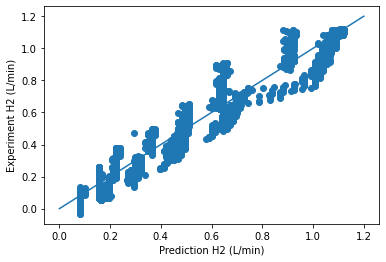

In [107]:
plt.scatter(y_pred, y_test)
plt.xlabel("Prediction H2 (L/min)")
plt.ylabel("Experiment H2 (L/min)")
plt.plot([0, 1.2], [0, 1.2])
plt.show()

In [108]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9430691722399777

In [109]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

0.07938092976381626


In [110]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

6.002777741761724


In [111]:
np.savetxt("nn2_test_train1test2.txt", y_test)

In [112]:
np.savetxt("nn2_pred_train1test2.txt", y_pred)